<a href="https://colab.research.google.com/github/disha2sinha/CropYield-prediction/blob/master/CropPrediction(Chikmagalur)_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Dataset(Bangalore rural District)

In [0]:
from google.colab import files
uploaded=files.upload()

Saving chikmagalur.csv to chikmagalur.csv


In [0]:
import io
import pandas as pd
df=pd.read_csv(io.BytesIO(uploaded['chikmagalur.csv']))
df.rename(columns={'vapour_pressure area':'vapour_pressure','Unnamed: 6':'area'},inplace=True)
df

,year,percipitation,min_temp,cloud_cover,vapour_pressure,production,area
0,1990,1679.358,25.848,45.494,24.441,2019,3254
1,1991,2485.867,25.984,45.483,24.596,1962,2423
2,1992,2872.205,25.871,45.483,24.373,2089,3800
3,1993,2293.874,25.918,45.483,24.440,2138,3630
4,1994,2583.243,25.829,45.483,24.400,1753,3534
5,1995,2074.373,26.172,45.483,24.690,1769,3090
6,1996,2610.518,26.134,45.863,24.677,1789,4679
7,1997,2662.193,26.335,44.194,24.572,1745,3786
8,1998,2931.677,26.487,45.384,24.898,1685,3651
9,1999,2127.181,25.981,45.684,24.327,1742,3896


### Showing correlation between dependent and independent variables

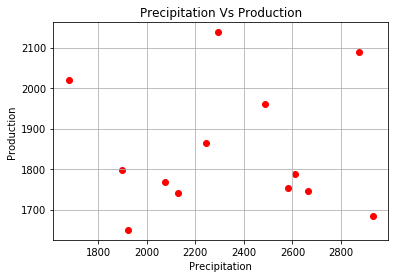

In [0]:
plt.scatter(df['percipitation'],df['production'],color='red')
plt.title("Precipitation Vs Production")
plt.xlabel("Precipitation")
plt.ylabel("Production")
plt.grid()
plt.show()

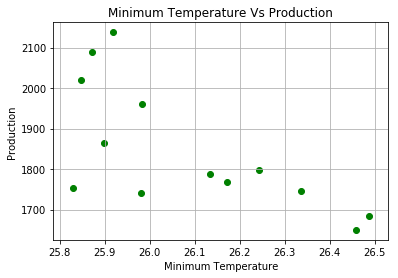

In [0]:
plt.scatter(df['min_temp'],df['production'],color='green')
plt.title("Minimum Temperature Vs Production")
plt.xlabel("Minimum Temperature")
plt.ylabel("Production")
plt.grid()
plt.show()

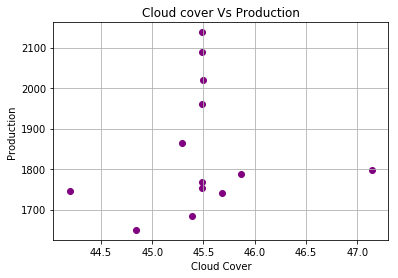

In [0]:
plt.scatter(df['cloud_cover'],df['production'],color="purple")
plt.title("Cloud cover Vs Production")
plt.xlabel("Cloud Cover")
plt.ylabel("Production")
plt.grid()
plt.show()

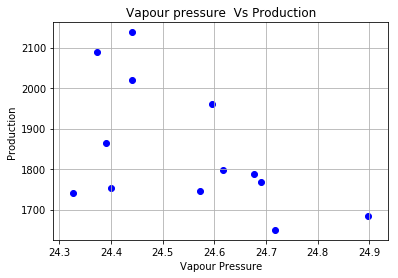

In [0]:
plt.scatter(df['vapour_pressure'],df['production'],color='blue')
plt.title("Vapour pressure  Vs Production")
plt.xlabel("Vapour Pressure")
plt.ylabel("Production")
plt.grid()
plt.show()

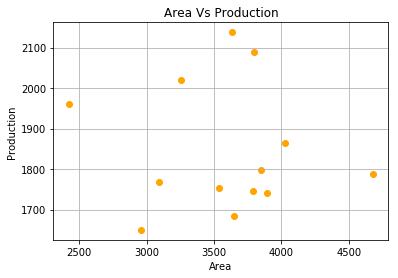

In [0]:
plt.scatter(df['area'],df['production'],color='orange')
plt.title("Area Vs Production")
plt.xlabel("Area")
plt.ylabel("Production")
plt.grid()
plt.show()

## Regression :

In [0]:

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [0]:

X = df[['percipitation'	,'min_temp'	,'cloud_cover'	,'vapour_pressure'	,'area']] 
Y = df['production']
 
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=1)
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
  



# prediction
y_pred=reg.predict(x_test)
print('Predicted Production:',y_pred,'\n')

# Coefficients
print('\nCoefficients: ', reg.coef_,'\n')

# R-squared score
print('\nR-squared score: ', r2_score(y_test,y_pred),'\n')

Predicted Production: [1898.02657962 1896.65080756 1941.59583296] 


Coefficients:  [-1.10251272e-03 -6.04685840e+02  9.06295721e-01  3.01470976e+02
 -3.65193513e-02] 


R-squared score:  -0.48323860845470823 



**ROW-wise Regression**

In [0]:
predicted_production=[]
actual_production=[]
errors=[]
for i in df.index.values:
  A_test=df.iloc[df.index==i].drop(['production'],axis=1)
  b_test=df.iloc[df.index==i]['production']
  A_train=df.drop(['production'],axis=1).drop([i],axis=0)
  b_train=df.drop([i])['production']
  reg=linear_model.LinearRegression()
  reg.fit(A_train,b_train)
  # prediction
  b_pred=reg.predict(A_test)
  actual_production.append(b_test.get_values()[0])
  predicted_production.append(b_pred[0])
  
for i in range(len(predicted_production)):
  errors.append(actual_production[i]-predicted_production[i])

year=1990
for i in range(len(predicted_production)):
  print('Year: ',year,'- Actual production: ',[actual_production[i]],', Predicted production: ',[predicted_production[i]],', Error: ',[errors[i]])
  year+=1

Year:  1990 - Actual production:  [2019] , Predicted production:  [2112.6013730175328] , Error:  [-93.60137301753275]
Year:  1991 - Actual production:  [1962] , Predicted production:  [1921.1387746720357] , Error:  [40.86122532796435]
Year:  1992 - Actual production:  [2089] , Predicted production:  [1928.014301504947] , Error:  [160.98569849505293]
Year:  1993 - Actual production:  [2138] , Predicted production:  [1927.0574596352963] , Error:  [210.94254036470375]
Year:  1994 - Actual production:  [1753] , Predicted production:  [2006.3358070403483] , Error:  [-253.3358070403483]
Year:  1995 - Actual production:  [1769] , Predicted production:  [1847.8117669162093] , Error:  [-78.81176691620931]
Year:  1996 - Actual production:  [1789] , Predicted production:  [1905.0816267007249] , Error:  [-116.08162670072488]
Year:  1997 - Actual production:  [1745] , Predicted production:  [1844.5142455086316] , Error:  [-99.51424550863157]
Year:  1998 - Actual production:  [1685] , Predicted prod

**Calculating RMS error**

In [0]:
import math
sum_error=0
for i in range(len(predicted_production)):
  diff=actual_production[i]-predicted_production[i]
  pow_diff=math.pow(diff,2)
  sum_error=sum_error+pow_diff
root_error=math.sqrt(sum_error)
rms_error=root_error/len(predicted_production)
print('\nRoot Mean Square error: ',rms_error,'\n')


Root Mean Square error:  45.87040095768309 

